In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataframe = pd.read_csv("train.csv")
df = train_dataframe

In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
cabins = df['Cabin']
cabin_block = []
cabin_num = []
cabin_side = []
for room in cabins:
    if type(room) != float:
        cabin_block.append(room[0])
        
        cabin_num.append(room[2:-2])
        
        cabin_side.append(room[-1])
    else:
        cabin_block.append('-')
        cabin_num.append('-')
        cabin_side.append('-')
        
df['cabin_block'] = cabin_block
df['cabin_num'] = cabin_num
df['cabin_side'] = cabin_side



In [5]:
df.drop('Name', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

In [6]:
spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_columns = ['cabin_block', 'cabin_side','HomePlanet', 'CryoSleep', 'Destination','VIP']
target = 'Transported'
age = 'Age'

In [7]:
for column in categorical_columns:
    column_data = df[column]
    
    new_column_data = []
    for data in column_data:
        if str(data) == 'nan':
            new_column_data.append('Unknown')
            continue
        new_column_data.append(data)
    
    df[column] = new_column_data
        
        

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
-     199
T       5
Name: cabin_block, dtype: int64


<AxesSubplot:xlabel='cabin_block', ylabel='Transported'>

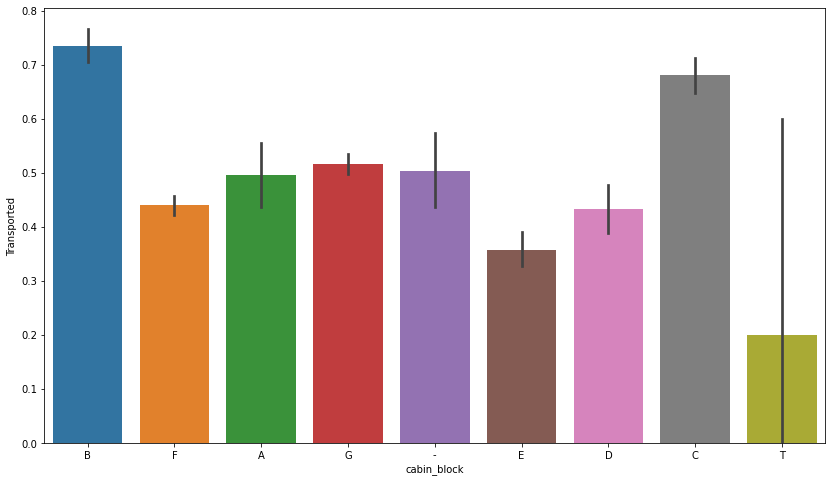

In [8]:
column = categorical_columns[0]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

S    4288
P    4206
-     199
Name: cabin_side, dtype: int64


<AxesSubplot:xlabel='cabin_side', ylabel='Transported'>

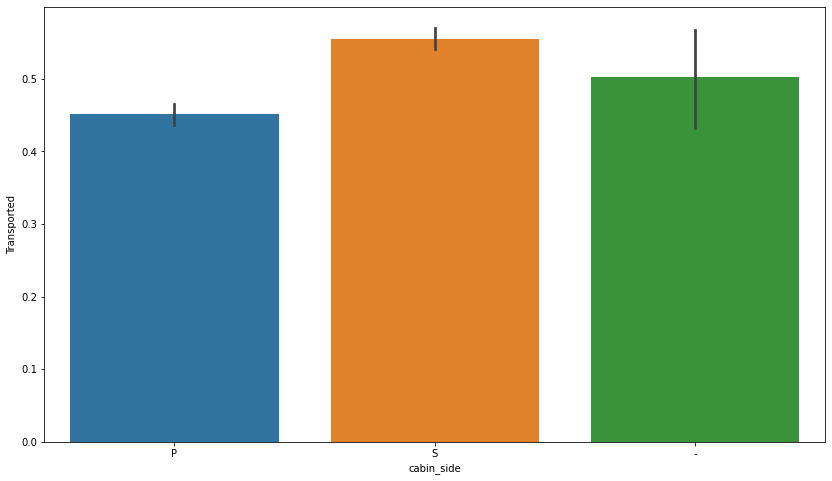

In [9]:
column = categorical_columns[1]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

Earth      4602
Europa     2131
Mars       1759
Unknown     201
Name: HomePlanet, dtype: int64


<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

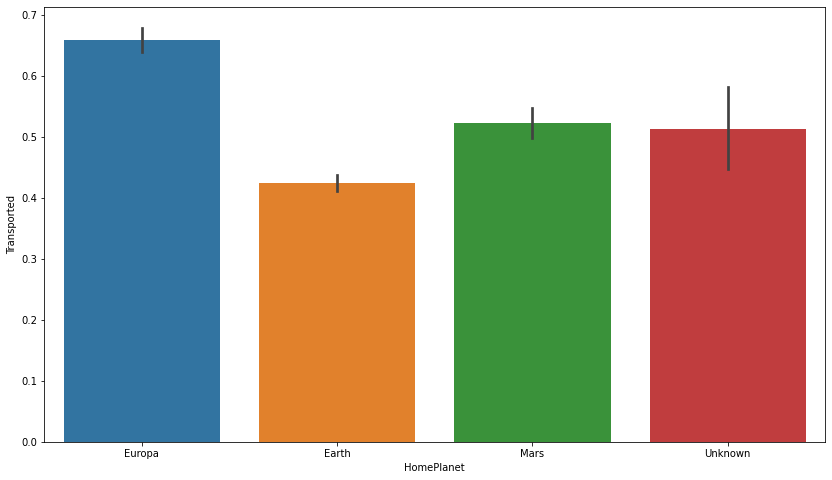

In [10]:
column = categorical_columns[2]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

False      5439
True       3037
Unknown     217
Name: CryoSleep, dtype: int64


<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

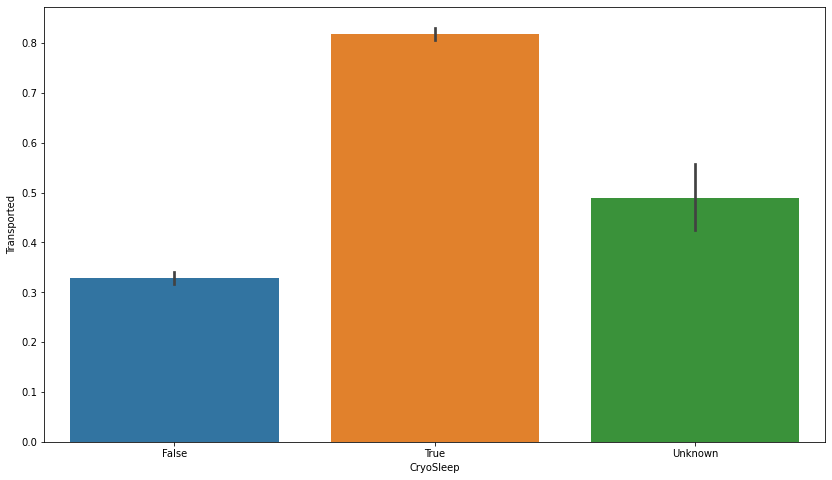

In [11]:
column = categorical_columns[3]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Unknown           182
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='Transported'>

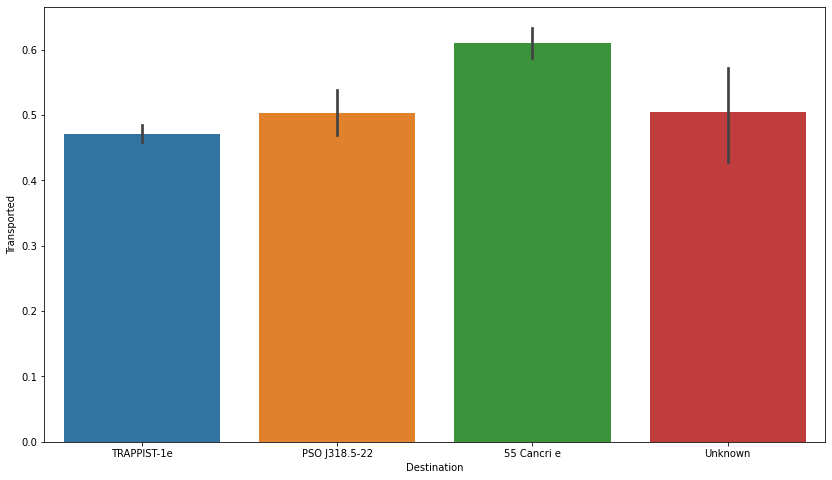

In [12]:
column = categorical_columns[4]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

False      8291
Unknown     203
True        199
Name: VIP, dtype: int64


<AxesSubplot:xlabel='VIP', ylabel='Transported'>

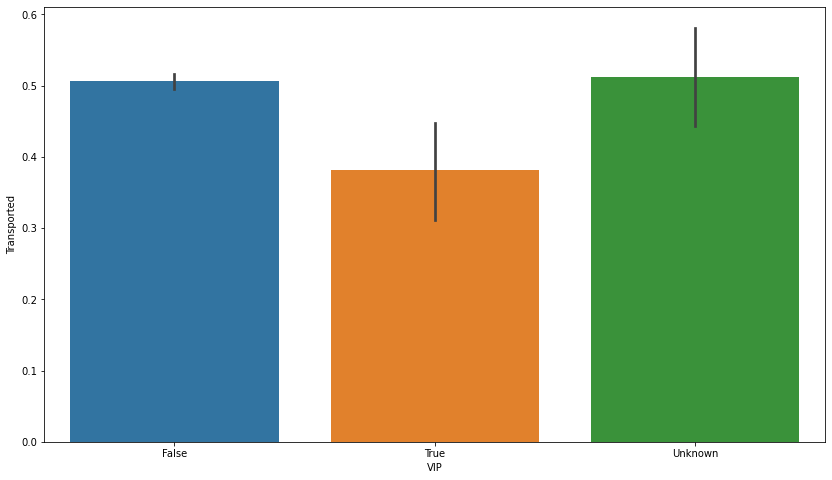

In [13]:
column = categorical_columns[5]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

In [14]:
spending_categories = [col+'_category' for col in spending_columns]



for i,column in enumerate(spending_columns):

    spender_type =[]
    spending = df[column]
    
    

    for amount in spending:
        if str(amount) == 'nan':
            spender_type.append(-1)            
        elif amount < 1:
            spender_type.append(0)
        elif amount < 500:
            spender_type.append(500)
        elif amount < 1000:
            spender_type.append(1000)
        elif amount < 2000:
            spender_type.append(2000)
        elif amount < 3000:
            spender_type.append(3000)
        elif amount < 5000:
            spender_type.append(5000)
        elif amount < 10000:
            spender_type.append(10000)
        else:
            spender_type.append(99999)
            
    df[spending_categories[i]] = spender_type
    
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_block,cabin_num,cabin_side,RoomService_category,FoodCourt_category,ShoppingMall_category,Spa_category,VRDeck_category
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0,0,0,0,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,500,500,500,1000,500
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,500,5000,0,10000,500
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,0,2000,500,5000,500
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,500,500,500,1000,500


 0        5577
 500      1718
 1000      616
 2000      394
-1         181
 3000      114
 5000       65
 10000      27
 99999       1
Name: RoomService_category, dtype: int64


<AxesSubplot:xlabel='RoomService_category', ylabel='Transported'>

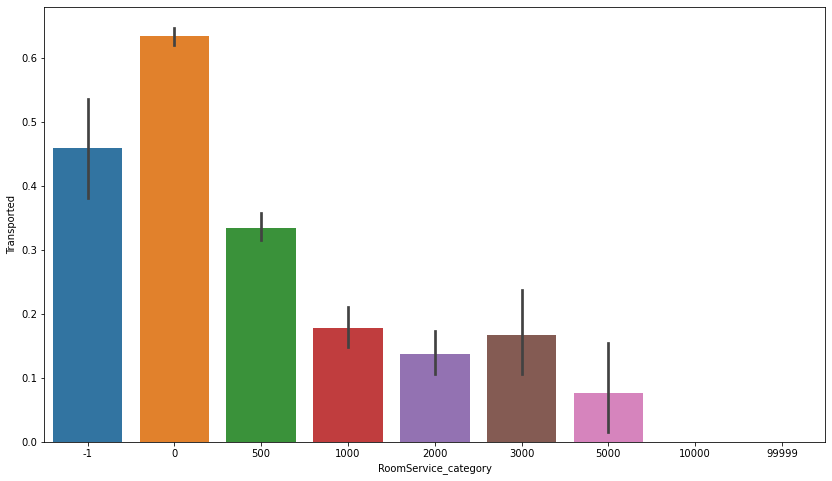

In [15]:
column = spending_categories[0]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

 0        5456
 500      1654
 1000      536
 2000      318
 5000      213
-1         183
 3000      152
 10000     129
 99999      52
Name: FoodCourt_category, dtype: int64


<AxesSubplot:xlabel='FoodCourt_category', ylabel='Transported'>

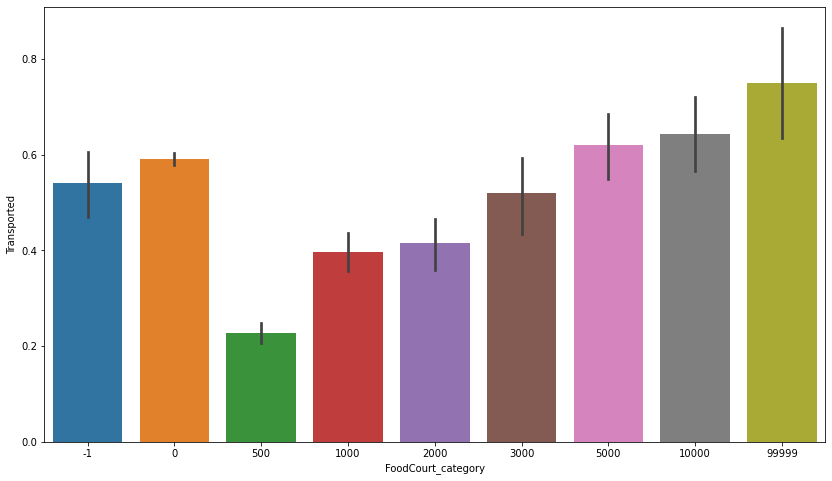

In [16]:
column = spending_categories[1]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

 0        5587
 500      1900
 1000      616
 2000      258
-1         208
 3000       80
 5000       28
 10000      12
 99999       4
Name: ShoppingMall_category, dtype: int64


<AxesSubplot:xlabel='ShoppingMall_category', ylabel='Transported'>

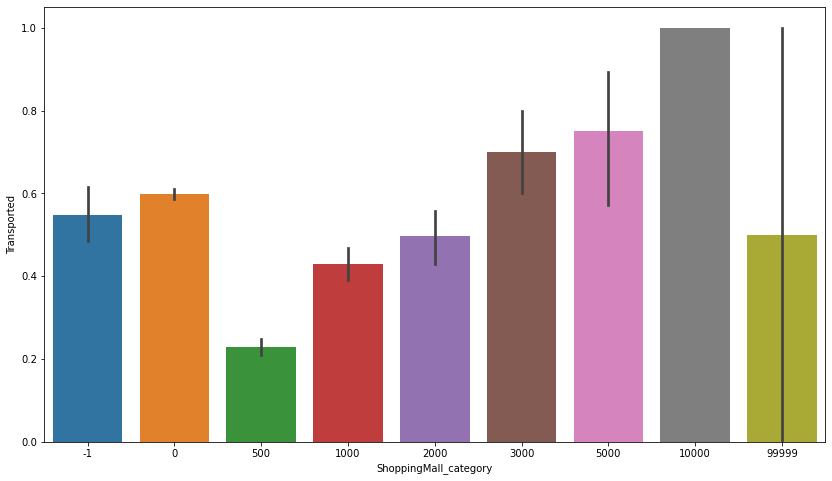

In [17]:
column = spending_categories[2]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

 0        5324
 500      1996
 1000      561
 2000      290
-1         183
 5000      129
 3000      113
 10000      73
 99999      24
Name: Spa_category, dtype: int64


<AxesSubplot:xlabel='Spa_category', ylabel='Transported'>

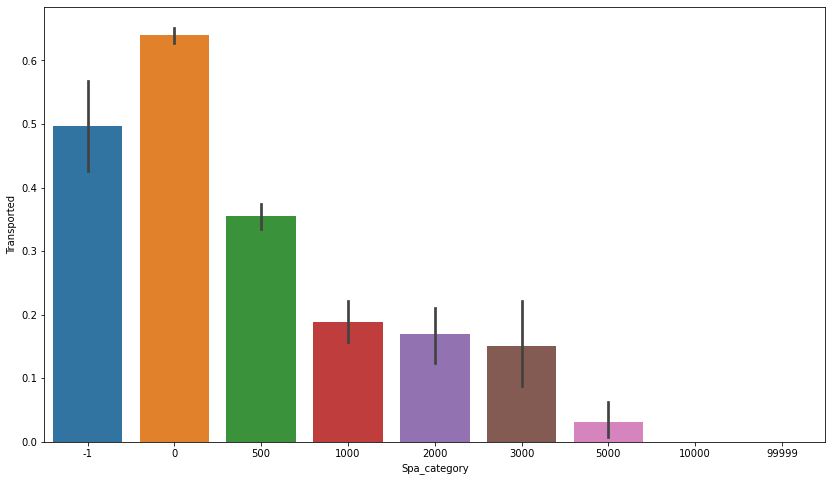

In [18]:
column = spending_categories[3]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

 0        5495
 500      1851
 1000      538
 2000      299
-1         188
 3000      108
 5000      106
 10000      80
 99999      28
Name: VRDeck_category, dtype: int64


<AxesSubplot:xlabel='VRDeck_category', ylabel='Transported'>

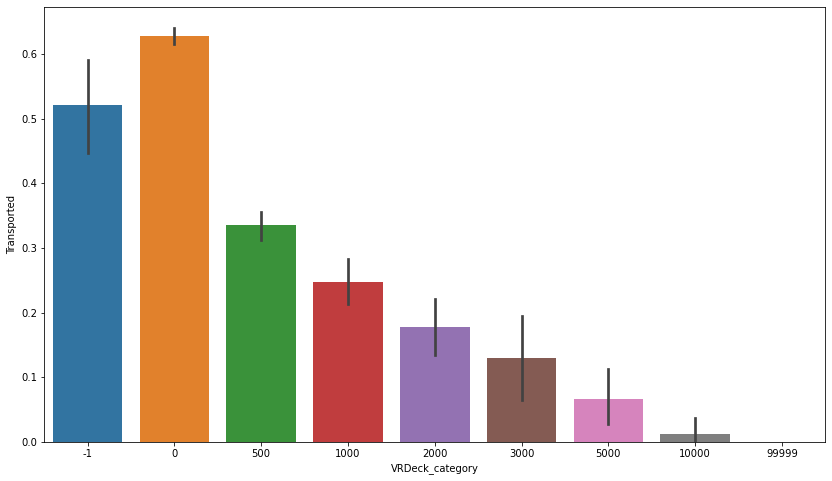

In [19]:
column = spending_categories[4]
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)

In [20]:
for category in categorical_columns:
    print(category)
    unique = df[category].unique()
    values = [val for val in unique]

    for value in values:
        count = len(df[df[category] == value])
        true_count = len(df[df[category] == value][df[target] == True])

        print(f'{value} : {count} : {true_count} : {int((true_count/count)*100)}%')

cabin_block
B : 779 : 572 : 73%
F : 2794 : 1229 : 43%
A : 256 : 127 : 49%
G : 2559 : 1321 : 51%
- : 199 : 100 : 50%
E : 876 : 313 : 35%
D : 478 : 207 : 43%
C : 747 : 508 : 68%
T : 5 : 1 : 20%
cabin_side
P : 4206 : 1898 : 45%
S : 4288 : 2380 : 55%
- : 199 : 100 : 50%
HomePlanet
Europa : 2131 : 1404 : 65%
Earth : 4602 : 1951 : 42%
Mars : 1759 : 920 : 52%
Unknown : 201 : 103 : 51%
CryoSleep
False : 5439 : 1789 : 32%
True : 3037 : 2483 : 81%
Unknown : 217 : 106 : 48%
Destination
TRAPPIST-1e : 5915 : 2787 : 47%
PSO J318.5-22 : 796 : 401 : 50%
55 Cancri e : 1800 : 1098 : 61%
Unknown : 182 : 92 : 50%
VIP
False : 8291 : 4198 : 50%
True : 199 : 76 : 38%
Unknown : 203 : 104 : 51%


/tmp/ipykernel_5248/807357331.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_count = len(df[df[category] == value][df[target] == True])


In [21]:
for category in spending_categories:
    print('----------')
    print(category)
    print('----------')
    
    unique = df[category].unique()
    values = [val for val in unique]

    for value in values:
        count = len(df[df[category] == value])
        true_count = len(df[df[category] == value][df[target] == True])

        print(f'{value} : {count} : {true_count} : {int((true_count/count)*100)}%')
    print('')
        

----------
RoomService_category
----------
0 : 5577 : 3532 : 63%


/tmp/ipykernel_5248/844017609.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_count = len(df[df[category] == value][df[target] == True])


500 : 1718 : 575 : 33%
1000 : 616 : 110 : 17%
2000 : 394 : 54 : 13%
-1 : 181 : 83 : 45%
10000 : 27 : 0 : 0%
3000 : 114 : 19 : 16%
5000 : 65 : 5 : 7%
99999 : 1 : 0 : 0%

----------
FoodCourt_category
----------
0 : 5456 : 3224 : 59%
500 : 1654 : 377 : 22%
5000 : 213 : 132 : 61%
2000 : 318 : 132 : 41%
1000 : 536 : 213 : 39%
10000 : 129 : 83 : 64%
3000 : 152 : 79 : 51%
-1 : 183 : 99 : 54%
99999 : 52 : 39 : 75%

----------
ShoppingMall_category
----------
0 : 5587 : 3345 : 59%
500 : 1900 : 435 : 22%
-1 : 208 : 114 : 54%
1000 : 616 : 265 : 43%
2000 : 258 : 128 : 49%
5000 : 28 : 21 : 75%
3000 : 80 : 56 : 70%
10000 : 12 : 12 : 100%
99999 : 4 : 2 : 50%

----------
Spa_category
----------
0 : 5324 : 3403 : 63%
1000 : 561 : 106 : 18%
10000 : 73 : 0 : 0%
5000 : 129 : 4 : 3%
500 : 1996 : 708 : 35%
2000 : 290 : 49 : 16%
3000 : 113 : 17 : 15%
-1 : 183 : 91 : 49%
99999 : 24 : 0 : 0%

----------
VRDeck_category
----------
0 : 5495 : 3451 : 62%
500 : 1851 : 621 : 33%
-1 : 188 : 98 : 52%
1000 : 538 : 13

In [22]:
spender_type = []

Ages = df['Age']

for amount in Ages:
    if str(amount) == 'nan':
        spender_type.append(-1)            
    elif amount < 5:
        spender_type.append(5)
    elif amount < 10:
        spender_type.append(10)
    elif amount < 15:
        spender_type.append(15)
    elif amount < 20:
        spender_type.append(20)
    elif amount < 30:
        spender_type.append(30)
    elif amount < 40:
        spender_type.append(40)
    elif amount < 50:
        spender_type.append(50)
    elif amount < 60:
        spender_type.append(60)
    elif amount < 70:
        spender_type.append(70)
    else:
        spender_type.append(100)
            
df['Age_Range'] = spender_type

In [23]:
category = 'Age_Range'
print(category)
unique = df[category].unique()
values = [val for val in unique]

for value in values:
    count = len(df[df[category] == value])
    true_count = len(df[df[category] == value][df[target] == True])

    print(f'{value} : {count} : {true_count} : {int((true_count/count)*100)}%')

Age_Range
40 : 1735 : 796 : 45%
30 : 2762 : 1296 : 46%
60 : 557 : 275 : 49%
20 : 1073 : 558 : 52%
50 : 1048 : 531 : 50%
15 : 406 : 230 : 56%
5 : 466 : 358 : 76%
10 : 213 : 125 : 58%
70 : 208 : 99 : 47%
-1 : 179 : 90 : 50%
100 : 46 : 20 : 43%


/tmp/ipykernel_5248/2060923879.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_count = len(df[df[category] == value][df[target] == True])


In [24]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'cabin_block', 'cabin_num', 'cabin_side',
       'RoomService_category', 'FoodCourt_category', 'ShoppingMall_category',
       'Spa_category', 'VRDeck_category', 'Age_Range'],
      dtype='object')

In [25]:
used_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
        'cabin_block', 'cabin_num', 'cabin_side', 'RoomService_category',
       'FoodCourt_category', 'ShoppingMall_category', 'Spa_category',
       'VRDeck_category', 'Age_Range']
target = 'Transported'

In [26]:
values = df['Age']
new_values = []

for value in values:
    if str(value) == 'nan':
        new_values.append(20)
    else:
        new_values.append(value)
df['Age']=new_values

In [27]:
pre_encode_dataframe = df.copy()

In [28]:
for column in categorical_columns:
    unique_values = list(df[column].unique())
    values = df[column]
    new_values = []
    
    for value in values:
        new_values.append(unique_values.index(value))
    df[column]=new_values

In [29]:
df.tail(60)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,cabin_block,cabin_num,cabin_side,RoomService_category,FoodCourt_category,ShoppingMall_category,Spa_category,VRDeck_category,Age_Range
8633,1,0,G/1486/S,0,60.0,0,0.0,8.0,NaN,360.0,...,False,3,1486,1,0,500,-1,500,500,70
8634,1,0,F/1884/P,0,24.0,0,0.0,90.0,0.0,795.0,...,True,1,1884,0,0,500,0,1000,0,30
8635,1,0,E/604/S,2,31.0,0,15.0,679.0,89.0,6.0,...,True,5,604,1,500,1000,500,500,0,40
8636,0,1,B/353/S,2,43.0,0,0.0,0.0,0.0,0.0,...,True,0,353,1,0,0,0,0,0,50
8637,1,0,G/1487/S,2,9.0,0,0.0,0.0,0.0,0.0,...,False,3,1487,1,0,0,0,0,0,10
8638,1,0,F/1783/S,0,51.0,0,6.0,0.0,0.0,0.0,...,True,1,1783,1,500,0,0,0,2000,60
8639,1,0,G/1496/P,0,25.0,0,2.0,45.0,45.0,0.0,...,False,3,1496,0,500,500,500,0,1000,30
8640,1,1,G/1496/P,0,20.0,0,0.0,0.0,0.0,0.0,...,True,3,1496,0,0,0,0,0,0,30
8641,1,0,F/1886/P,1,22.0,0,623.0,0.0,NaN,0.0,...,True,1,1886,0,1000,0,-1,0,500,30
8642,1,1,G/1497/P,0,21.0,0,0.0,0.0,0.0,0.0,...,False,3,1497,0,0,0,0,0,-1,30


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HomePlanet             8693 non-null   int64  
 1   CryoSleep              8693 non-null   int64  
 2   Cabin                  8494 non-null   object 
 3   Destination            8693 non-null   int64  
 4   Age                    8693 non-null   float64
 5   VIP                    8693 non-null   int64  
 6   RoomService            8512 non-null   float64
 7   FoodCourt              8510 non-null   float64
 8   ShoppingMall           8485 non-null   float64
 9   Spa                    8510 non-null   float64
 10  VRDeck                 8505 non-null   float64
 11  Transported            8693 non-null   bool   
 12  cabin_block            8693 non-null   int64  
 13  cabin_num              8693 non-null   object 
 14  cabin_side             8693 non-null   int64  
 15  Room

In [31]:
X = df[used_columns]
y = df[target]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=1000,random_state=0)

model_1.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

pred = model_1.predict(X_train)


print('Performance of Model on training data :')

print('Accuracy: ',accuracy_score(y_train, pred))
print('Precision: ',precision_score(y_train, pred))
print('Recall: ',recall_score(y_train, pred))
print('F1-Score: ',f1_score(y_train, pred))

Performance of Model on training data :
Accuracy:  0.999712395743457
Precision:  0.9994288977727013
Recall:  1.0
F1-Score:  0.9997143673236218


In [42]:
pred = model_1.predict(X_test)


print('Performance of Model on training data :')

print('Accuracy: ',accuracy_score(y_test, pred))
print('Precision: ',precision_score(y_test, pred))
print('Recall: ',recall_score(y_test, pred))
print('F1-Score: ',f1_score(y_test, pred))

Performance of Model on training data :
Accuracy:  0.7975848188614146
Precision:  0.815347721822542
Recall:  0.7744874715261959
F1-Score:  0.7943925233644861


/tmp/ipykernel_5248/4085477452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Transported']==False]['cabin_num'],color='blue')
/tmp/ipykernel_5248/4085477452.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Transported']==True]['cabin_num'],color='red')


<AxesSubplot:xlabel='cabin_num', ylabel='Density'>

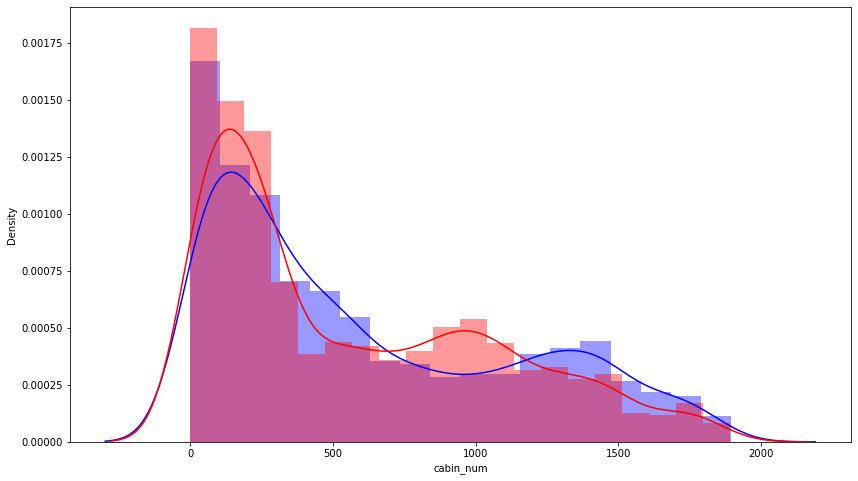

In [44]:
plt.figure(figsize=(14, 8))
sns.distplot(df[df['Transported']==False]['cabin_num'],color='blue')
sns.distplot(df[df['Transported']==True]['cabin_num'],color='red')

In [51]:
column = 'cabin_num'
spender_type =[]
spending = df[column]



for amount in spending:
    amount = int(amount)
    if amount < 0:
        spender_type.append('-1')
    elif amount < 275:
        spender_type.append('0-275')
    elif amount < 625:
        spender_type.append('275-625')
    elif amount < 1175:
        spender_type.append('625-1125')
    else:
        spender_type.append('1125-')

df['cabin_num_sec'] = spender_type
    

0-275       3317
275-625     1817
625-1125    1815
1125-       1545
-1           199
Name: cabin_num_sec, dtype: int64


<AxesSubplot:xlabel='cabin_num_sec', ylabel='Transported'>

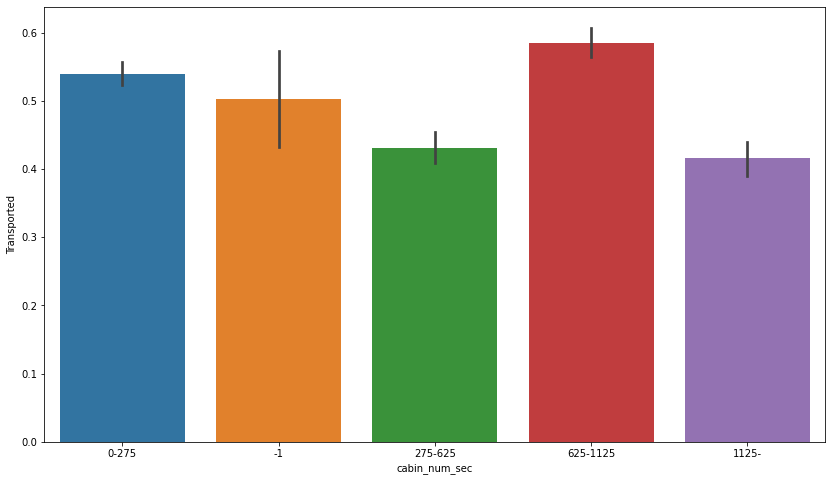

In [67]:
column = 'cabin_num_sec'
print(df[column].value_counts())
plt.figure(figsize=(14, 8))
sns.barplot(x = column,
            y = target,
            data = df)